In [3]:
import pandas as pd
import ast
df = pd.read_csv('streamlit_app/datasets/raw/films.csv')


In [6]:
df. describe()

,id,popularity,vote_average,decennie,startYear,runtimeMinutes
count,1.097300e+04,10973.000000,10973.000000,10973.000000,10973.000000,10973.000000
mean,5.076505e+05,5.290837,5.359077,2007.741730,2011.654698,98.860567
std,4.208062e+05,23.366807,1.989143,13.101166,12.673055,17.666248
min,2.400000e+01,0.600000,0.000000,1980.000000,1980.000000,45.000000
25%,8.205000e+04,1.022000,4.973000,2000.000000,2004.000000,89.000000
50%,4.269730e+05,1.897300,5.811000,2010.000000,2016.000000,97.000000
75%,9.083270e+05,4.814000,6.559000,2020.000000,2022.000000,106.000000
max,1.491034e+06,1170.178000,10.000000,2020.000000,2026.000000,247.000000


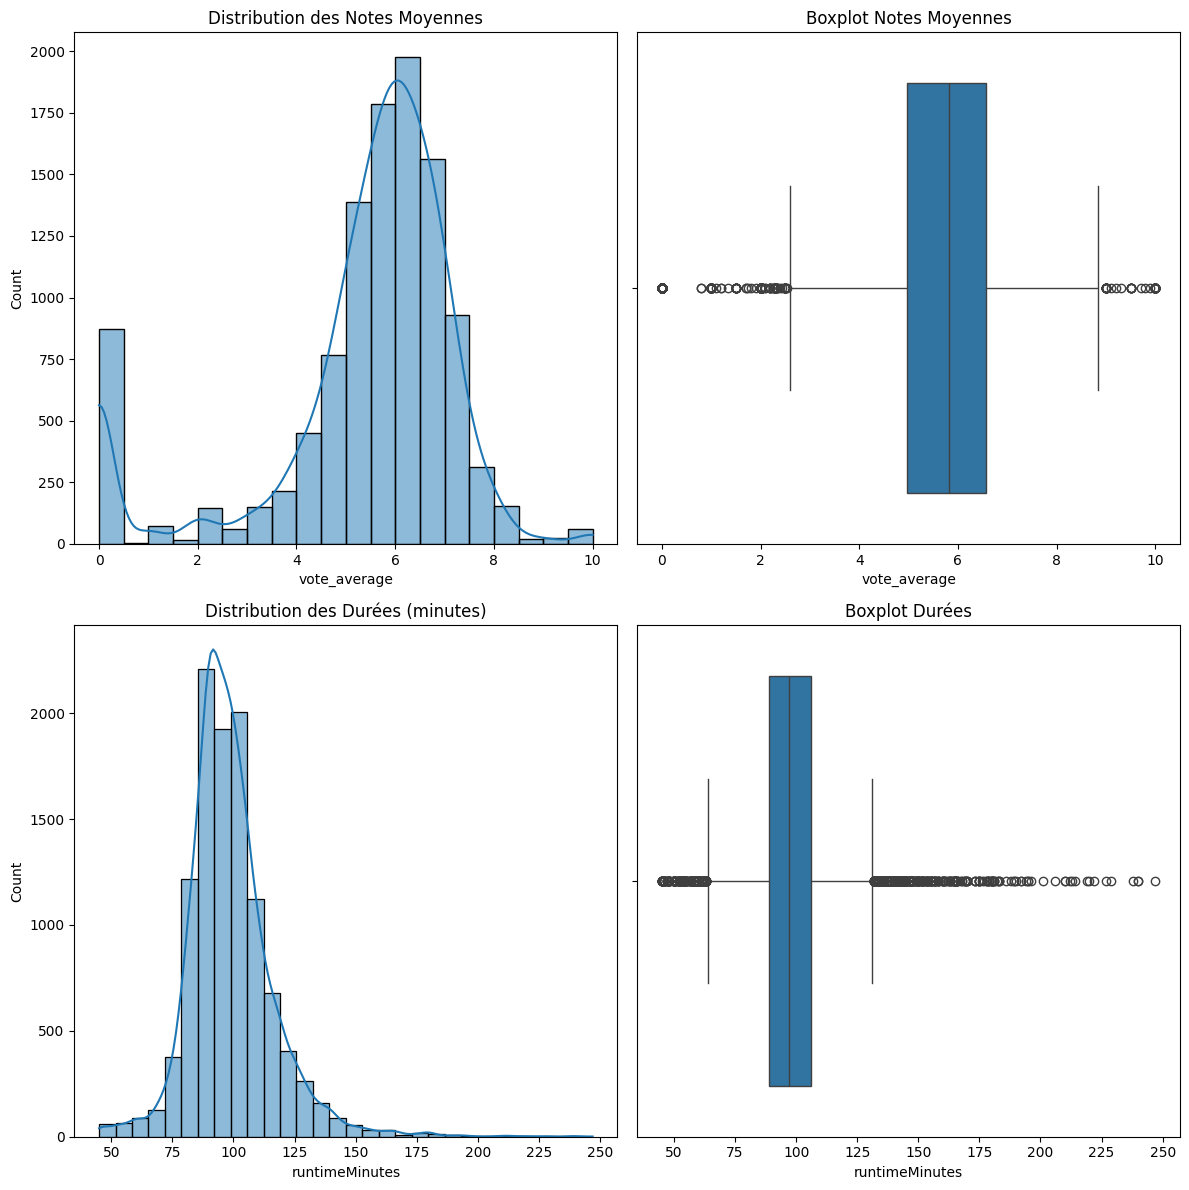

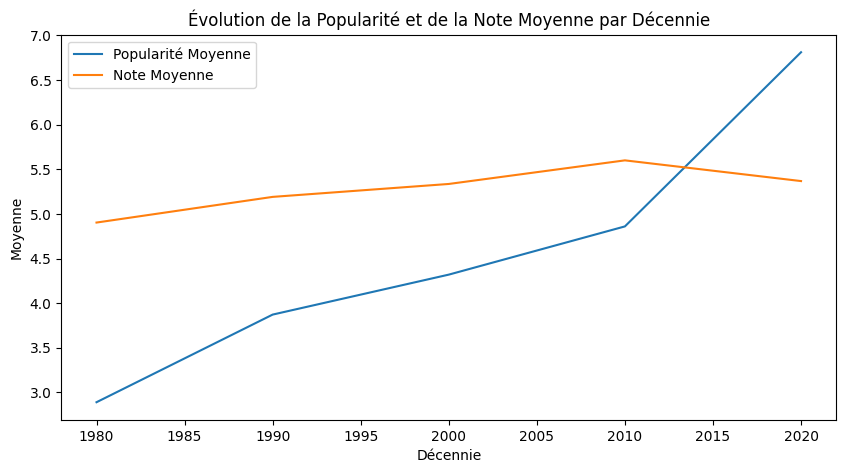

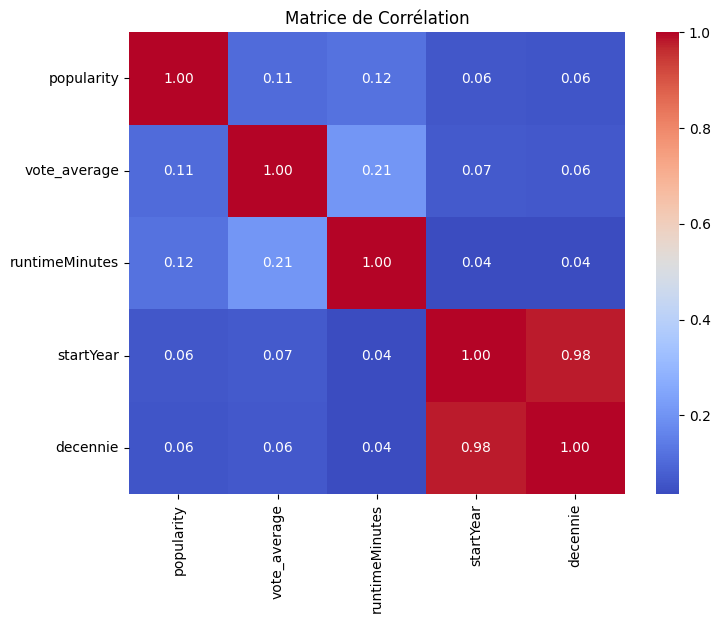

Coefficient de corrélation de Pearson entre Popularité et Note Moyenne : 0.106
P-value : 4.96e-29


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import plotly.express as px

# Étape 1 : Histogrammes et boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Vote Average
sns.histplot(df['vote_average'], bins=20, ax=axes[0,0], kde=True)
axes[0,0].set_title('Distribution des Notes Moyennes')

sns.boxplot(x=df['vote_average'], ax=axes[0,1])
axes[0,1].set_title('Boxplot Notes Moyennes')

# Runtime Minutes
sns.histplot(df['runtimeMinutes'], bins=30, ax=axes[1,0], kde=True)
axes[1,0].set_title('Distribution des Durées (minutes)')

sns.boxplot(x=df['runtimeMinutes'], ax=axes[1,1])
axes[1,1].set_title('Boxplot Durées')

plt.tight_layout()
plt.show()

# Étape 3 : Évolution par décennie
pop_by_decennie = df.groupby('decennie')['popularity'].mean()
vote_by_decennie = df.groupby('decennie')['vote_average'].mean()

plt.figure(figsize=(10,5))
pop_by_decennie.plot(label='Popularité Moyenne')
vote_by_decennie.plot(label='Note Moyenne')
plt.title('Évolution de la Popularité et de la Note Moyenne par Décennie')
plt.xlabel('Décennie')
plt.ylabel('Moyenne')
plt.legend()
plt.show()

# Étape 4 : Matrice de corrélation et heatmap
corr_matrix = df[['popularity', 'vote_average', 'runtimeMinutes', 'startYear', 'decennie']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

# Étape 5 : Test de corrélation de Pearson entre popularité et vote_average
corr_coef, p_value = pearsonr(df['popularity'], df['vote_average'])
print(f"Coefficient de corrélation de Pearson entre Popularité et Note Moyenne : {corr_coef:.3f}")
print(f"P-value : {p_value:.3g}")

# Etapes 6 : Evolution dynamique du genre selon la décennie



In [10]:
# Runtime Minutes
sns.histplot(df['runtimeMinutes'], bins=30, ax=axes[1,0], kde=True)
axes[1,0].set_title('Distribution des Durées (minutes)')

sns.boxplot(x=df['runtimeMinutes'], ax=axes[1,1])
axes[1,1].set_title('Boxplot Durées')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [41]:
# Supprimer les lignes avec valeurs manquantes dans les colonnes critiques
df = df.dropna(subset=['genres', 'decennie', 'popularity'])

# Fonction pour convertir uniquement les chaînes valides
def safe_literal_eval(val):
    try:
        result = ast.literal_eval(val)
        if isinstance(result, list):
            return result
        else:
            return None
    except:
        return None

# Appliquer la conversion sécurisée
df['genres'] = df['genres'].apply(safe_literal_eval)

# Supprimer les lignes où la conversion a échoué
df = df.dropna(subset=['genres'])

# Exploser les genres
df = df.explode('genres')

# Grouper par décennie et genre
grouped = df.groupby(['decennie', 'genres'])['popularity'].mean().reset_index()

# Créer le graphique
fig = px.line(
    grouped,
    x='decennie',
    y='popularity',
    color='genres',
    markers=True,
    title="Évolution de la popularité des genres de films par décennie",
    labels={
        'decennie': 'Décennie',
        'popularity': 'Popularité moyenne',
        'genres': 'Genre'
    }
)

fig.show()

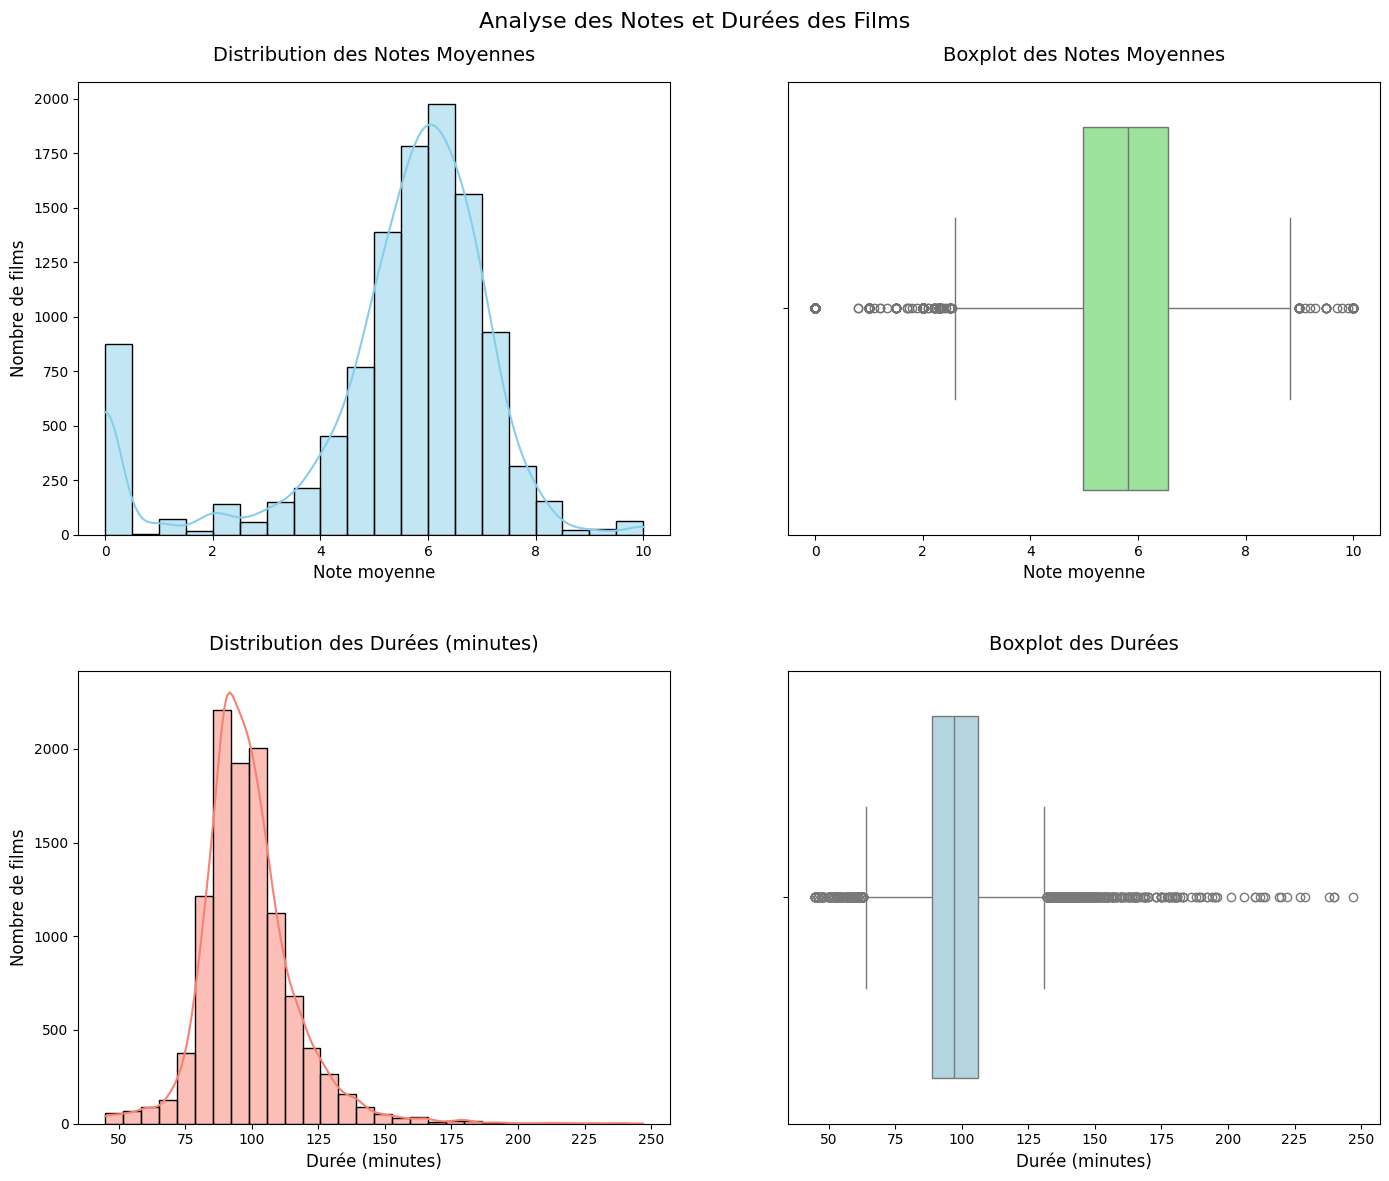

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données (assurez-vous que df est déjà chargé)
# df = pd.read_csv('chemin/vers/votre/fichier.csv')

# Créer une figure avec 2x2 sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histogramme des notes moyennes
sns.histplot(df['vote_average'], bins=20, ax=axes[0,0], kde=True, color='skyblue')
axes[0,0].set_title('Distribution des Notes Moyennes', fontsize=14, pad=15)
axes[0,0].set_xlabel('Note moyenne', fontsize=12)
axes[0,0].set_ylabel('Nombre de films', fontsize=12)

# 2. Boxplot des notes moyennes
sns.boxplot(x=df['vote_average'], ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Boxplot des Notes Moyennes', fontsize=14, pad=15)
axes[0,1].set_xlabel('Note moyenne', fontsize=12)

# 3. Histogramme des durées
sns.histplot(df['runtimeMinutes'], bins=30, ax=axes[1,0], kde=True, color='salmon')
axes[1,0].set_title('Distribution des Durées (minutes)', fontsize=14, pad=15)
axes[1,0].set_xlabel('Durée (minutes)', fontsize=12)
axes[1,0].set_ylabel('Nombre de films', fontsize=12)

# 4. Boxplot des durées
sns.boxplot(x=df['runtimeMinutes'], ax=axes[1,1], color='lightblue')
axes[1,1].set_title('Boxplot des Durées', fontsize=14, pad=15)
axes[1,1].set_xlabel('Durée (minutes)', fontsize=12)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.3, wspace=0.2)

# Ajouter un titre général
plt.suptitle('Analyse des Notes et Durées des Films', fontsize=16, y=0.98)

# Afficher le graphique
plt.show()

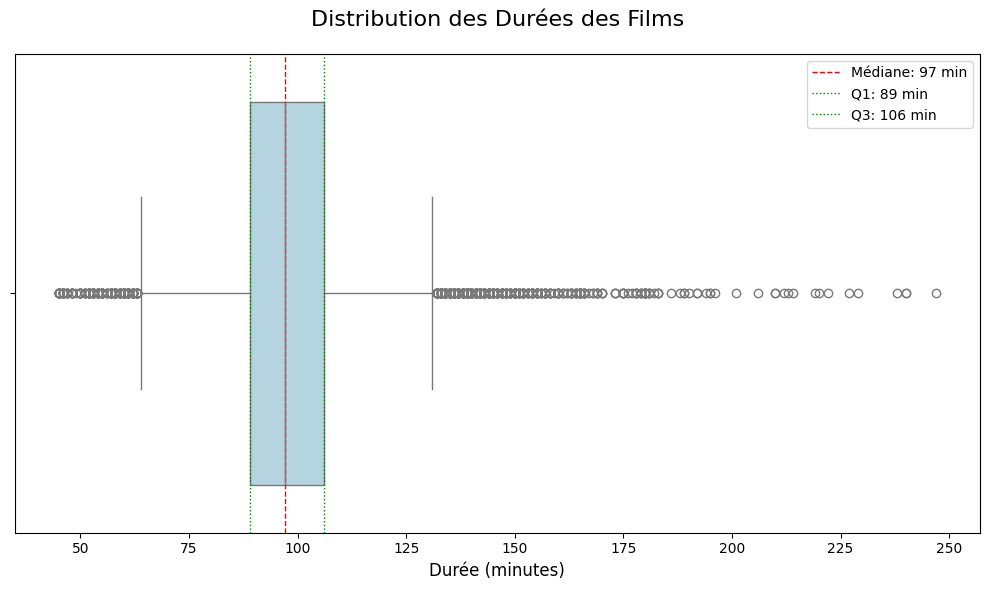


Statistiques descriptives des durées :
- Médiane : 97 minutes
- Premier quartile (Q1) : 89 minutes
- Troisième quartile (Q3) : 106 minutes
- Écart interquartile (IQR) : 17 minutes
- Durée minimale : 45 minutes
- Durée maximale : 247 minutes


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une figure avec une taille adaptée
plt.figure(figsize=(10, 6))

# Créer le boxplot des durées
box = sns.boxplot(x=df['runtimeMinutes'], color='lightblue')

# Personnaliser le graphique
plt.title('Distribution des Durées des Films', fontsize=16, pad=20)
plt.xlabel('Durée (minutes)', fontsize=12)
plt.xticks(fontsize=10)

# Afficher la médiane et les quartiles
med = df['runtimeMinutes'].median()
q1 = df['runtimeMinutes'].quantile(0.25)
q3 = df['runtimeMinutes'].quantile(0.75)

plt.axvline(med, color='red', linestyle='--', linewidth=1, 
            label=f'Médiane: {med:.0f} min')
plt.axvline(q1, color='green', linestyle=':', linewidth=1, 
            label=f'Q1: {q1:.0f} min')
plt.axvline(q3, color='green', linestyle=':', linewidth=1, 
            label=f'Q3: {q3:.0f} min')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()

# Afficher quelques statistiques descriptives
print("\nStatistiques descriptives des durées :")
print(f"- Médiane : {med:.0f} minutes")
print(f"- Premier quartile (Q1) : {q1:.0f} minutes")
print(f"- Troisième quartile (Q3) : {q3:.0f} minutes")
print(f"- Écart interquartile (IQR) : {q3 - q1:.0f} minutes")
print(f"- Durée minimale : {df['runtimeMinutes'].min():.0f} minutes")
print(f"- Durée maximale : {df['runtimeMinutes'].max():.0f} minutes")